In [4]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [8]:
data = pd.read_csv('C:/Users/Revanth Sivaraju/Downloads/CLI data.csv', index_col=0)
data.head()

,City,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
Rank,,,,,,
1,"Zurich, Switzerland",149.53,66.76,163.71,140.58,126.30
2,"Hamilton, Bermuda",148.13,117.80,145.20,152.54,93.42
3,"Zug, Switzerland",142.54,67.39,148.36,143.18,105.62
4,"Geneva, Switzerland",142.12,70.25,147.13,138.96,115.20
5,"Basel, Switzerland",142.02,51.54,149.54,131.72,113.13


In [9]:
data.shape

(511, 6)

In [15]:
data.head()

,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
Rank,,,,,
1,149.53,66.76,163.71,140.58,126.30
2,148.13,117.80,145.20,152.54,93.42
3,142.54,67.39,148.36,143.18,105.62
4,142.12,70.25,147.13,138.96,115.20
5,142.02,51.54,149.54,131.72,113.13


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 1 to 511
Data columns (total 5 columns):
CostofLivingIndex            511 non-null float64
RentIndex                    511 non-null float64
GroceriesIndex               511 non-null float64
RestaurantPriceIndex         511 non-null float64
LocalPurchasingPowerIndex    511 non-null float64
dtypes: float64(5)
memory usage: 24.0 KB


In [17]:
data.describe()

,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,65.177691,26.765793,63.414697,58.992524,79.989687
std,22.371029,17.651107,24.380114,26.669124,33.742696
min,21.750000,3.130000,22.030000,12.120000,2.960000
25%,45.740000,12.975000,42.460000,33.325000,51.285000
50%,70.640000,24.540000,64.980000,65.370000,84.160000
75%,79.765000,34.440000,80.460000,78.175000,104.555000
max,149.530000,119.630000,163.710000,152.540000,176.220000


## Visualize Data

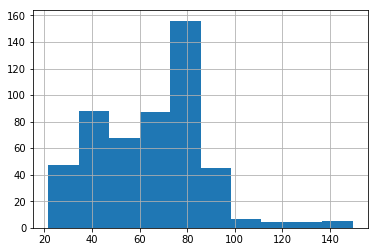

In [18]:


data['CostofLivingIndex'].hist();

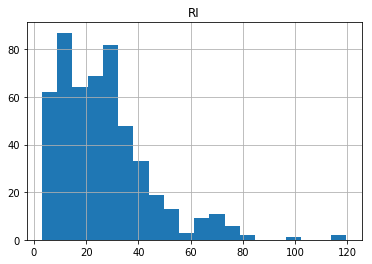

In [19]:
data['RentIndex'].hist(bins=20)
plt.title("RI");


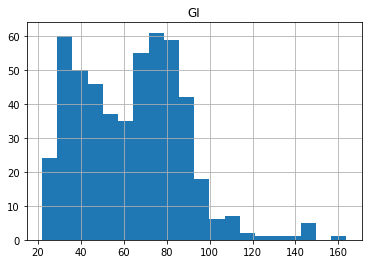

In [20]:
data['GroceriesIndex'].hist(bins=20)
plt.title('GI');

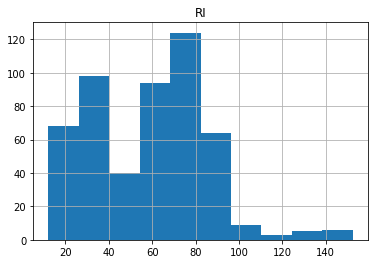

In [21]:
data['RestaurantPriceIndex'].hist()
plt.title('RI');

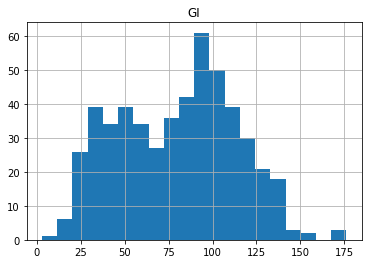

In [22]:
data['LocalPurchasingPowerIndex'].hist(bins=20)
plt.title('GI');



---

## Correlations

In [23]:

data.corr()

,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
CostofLivingIndex,1.000000,0.785660,0.951882,0.950629,0.642080
RentIndex,0.785660,1.000000,0.767436,0.752309,0.600043
GroceriesIndex,0.951882,0.767436,1.000000,0.851855,0.645834
RestaurantPriceIndex,0.950629,0.752309,0.851855,1.000000,0.643693
LocalPurchasingPowerIndex,0.642080,0.600043,0.645834,0.643693,1.000000


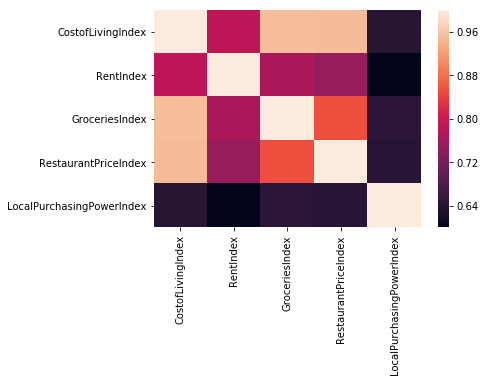

In [24]:
sns.heatmap(data.corr());

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict

scale = StandardScaler()

C:\Users\Revanth Sivaraju\Anaconda31\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
x = data.iloc[:, 1:6]
y = data[['CostofLivingIndex']]

In [37]:
x_scaled = scale.fit_transform(x)

In [38]:
lr = linear_model.LinearRegression()
LR = lr.fit(x, y)

In [39]:
LR.intercept_

array([10.66385247])

In [40]:
LR.coef_

array([[ 0.02610766,  0.47939881,  0.43244593, -0.02621539]])

In [ ]:
# Regression Equation
LR.intercept_ + LR.coef_[0] * X1 + LR.coef_[1] * X2 + LR.coef_[2] * X3

In [42]:
yhat = LR.predict(x_scaled)

In [43]:
predicted = cross_val_predict(lr, x, y, cv=10)

In [44]:
def predictSales(RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex):
    return(10.66385247 + (0.02610766*RentIndex) + (0.47939881*GroceriesIndex) + (0.43244593*RestaurantPriceIndex)-(0.02621539*LocalPurchasingPowerIndex))

In [45]:
data.head()

,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
Rank,,,,,
1,149.53,66.76,163.71,140.58,126.30
2,148.13,117.80,145.20,152.54,93.42
3,142.54,67.39,148.36,143.18,105.62
4,142.12,70.25,147.13,138.96,115.20
5,142.02,51.54,149.54,131.72,113.13


In [46]:
predictSales(66.76,163.71,140.58,126.30)

148.3714241191

In [47]:
predictSales(500, 10, 20,90)

34.801204070000004

In [49]:
predictSales(17.2,45.9,69.3,122)

59.88753497

In [50]:
LR.score(x, y, sample_weight=None)

0.9781868337978363